 Dataset Shape: (891, 12)

 First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0    

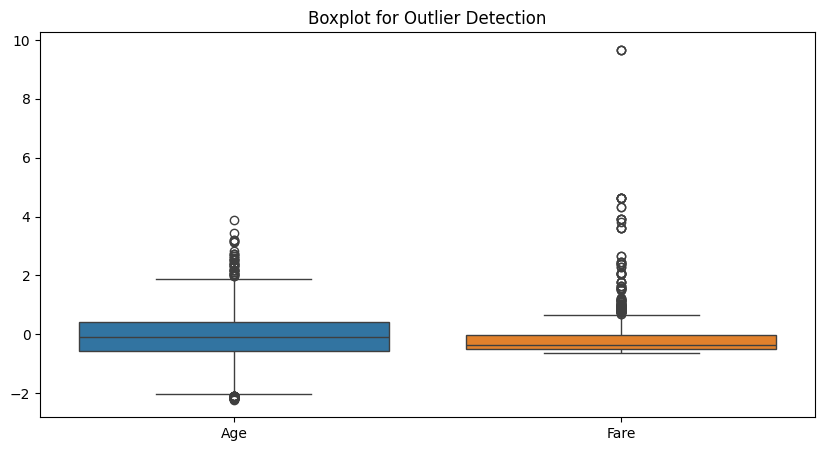


 Shape After Outlier Removal: (718, 11)

 Cleaned Dataset Preview:
    PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    1 -0.565736      1      0   
2                        Heikkinen, Miss. Laina    0 -0.258337      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1      0   
4                      Allen, Mr. William Henry    1  0.433312      0      0   
5                              Moran, Mr. James    1 -0.104637      0      0   

             Ticket      Fare  Embarked  
0         A/5 21171 -0.502445         2  
2  STON/O2. 3101282 -0.488854         2  
3            113803  0.420730         2  
4            373450 -0.486337         2  
5            330877 -0.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# To display all columns
pd.set_option('display.max_columns', None)

# ----------------------------------
# Step 2: Load Dataset
# ----------------------------------
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Basic exploration
print(" Dataset Shape:", df.shape)
print("\n First 5 rows:\n", df.head())
print("\n Data Types:\n", df.dtypes)
print("\n Missing Values:\n", df.isnull().sum())

# ----------------------------------
# Step 3: Handle Missing Values
# ----------------------------------
# Fill 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill 'Embarked' with mode (most frequent value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' column (too many missing values)
df = df.drop(columns=['Cabin'])

print("\n Missing Values After Handling:\n", df.isnull().sum())

# ----------------------------------
# Step 4: Encode Categorical Variables
# ----------------------------------
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])

print("\n Categorical Columns Encoded Successfully!\n")
print(df[['Sex', 'Embarked']].head())

# ----------------------------------
# Step 5: Normalize / Standardize Numerical Features
# ----------------------------------
scaler = StandardScaler()
num_cols = ['Age', 'Fare']
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\n Numerical Columns Standardized!\n")
print(df[num_cols].describe())

# ----------------------------------
# Step 6: Detect & Visualize Outliers
# ----------------------------------
plt.figure(figsize=(10,5))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot for Outlier Detection")
plt.show()

# ----------------------------------
# Step 7: Remove Outliers Using IQR Method
# ----------------------------------
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("\n Shape After Outlier Removal:", df.shape)

# ----------------------------------
# Step 8: Final Cleaned Dataset Overview
# ----------------------------------
print("\n Cleaned Dataset Preview:\n", df.head())
print("\n Final Missing Values Check:\n", df.isnull().sum())

# ----------------------------------
# Step 9: Save the Cleaned Dataset
# ----------------------------------
df.to_csv("cleaned_titanic.csv", index=False)
print("\n Cleaned dataset saved as 'cleaned_titanic.csv'")